# Load data tutorial

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

## Example: Abalone dataset

If the dataset is small, we can load it into memory as a pandas Dataframe or a NumPy array.

In [4]:
# Load the abalone dataset from a CSV as pandas dataframe
csv_path = "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv"
attributes = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"]
abalone_train = pd.read_csv(csv_path, names=attributes)

In [5]:
# Let's see the first rows of our dataframe
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [6]:
# We want to predict the age from the other features, so we separate
# the features and labels
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop("Age")

In [7]:
# Features
abalone_features.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300


In [8]:
# And labels
abalone_labels.head()

0     7
1     6
2    14
3    16
4    13
Name: Age, dtype: int64

In [9]:
# We will treat all the features identically. Pack them
# into a numpy array:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [10]:
# Let's inspect the shape of the dataset
abalone_features.shape

(3320, 7)

In [11]:
# Similarly, we have 3320 labels
len(abalone_labels)

3320

We have 3320 training examples. Each of them contains the values for 7 different attributes.

### Build model

In [12]:
# Let's make a regression model to predict the age
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

In [13]:
abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer=tf.optimizers.Adam())

## Train the model

In [14]:
# Let's train the model for 10 epochs
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 2s 3ms/step - loss: 55.2737
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 11.5428
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 9.0158
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.3752
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 7.7902
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 7.3529
Epoch 7/10
104/104 [==============================] - 0s 3ms/step - loss: 7.0149
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 6.7742
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 6.6193
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 6.5071


### More preprocessing
Now let's dive more into the preprocessing step.

In [15]:
# Let's normalized the input data. First, we create 
# the normalization layer.
normalize = layers.Normalization()

In [16]:
# Now let's 'adapt' the normalization to our training data.
# Here, we are computing the mean and the variance for each
# column.
normalize.adapt(abalone_features)

In [17]:
# Now, let's add this normalization layer to our previous 
# defined architecture
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

In [18]:
# Compile the model again
norm_abalone_model.compile(loss=tf.losses.MeanSquaredError(),
                           optimizer=tf.optimizers.Adam())

In [19]:
# And train the model again for 10 epochs
norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 92.2241
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 53.0126
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 16.4541
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 5.9536
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 5.1209
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 5.0208
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 5.0024
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9840
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9564
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9400


## Another example: Titanic dataset

In [20]:
# Let's load the CSV as a dataframe
csv_path = "https://storage.googleapis.com/tf-datasets/titanic/train.csv" 
titanic = pd.read_csv(csv_path)

In [21]:
# Let's inspect the dataframe
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


We want to predict who survived to the accident. However, we have non numerical variables in the dataframe, like 'sex', 'class', etc.

In [22]:
# Let's split the dataframe in features and labels
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop("survived")

In [23]:
# Let's see the features
titanic_features.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [24]:
# And the labels
titanic_labels.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

We have to preprocess the data. We can do it offline or we can use the Keras preprocessing layers instead. The latter is recommended because when you save and export the model, the preprocessing layers will be exported with it. 

A note on **symbolic tensors**: as opposite to **eager tensors**, they don't hold a value; they keep track of the operations run on them. Let's see an example:

In [25]:
# Let's create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input+1

# And see the result, which is empty
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [26]:
# Let's define a model using this calculation
calc = tf.keras.Model(inputs=input, outputs=result)

In [27]:
# And now use this model
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


Ok, back to our problem:

In [28]:
# Let's inspect the type of some columns
print(titanic_features["sex"].dtype)
print(titanic_features["age"].dtype)

object
float64


In [29]:
# To build the preprocessing pipeline, we use a set of
# symbolic inputs 
inputs = {}

for name, column in titanic_features.items():
  # Let's define the dtype based on the original dtype
  dtype = column.dtype
  dtype = tf.string if dtype==object else tf.float32

  # And let's add the input. The name is the same as the
  # column's name on the dataframe
  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

# Now, let's see the inputs
inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>}

In [30]:
# Let's get only the numeric inputs for the model
numeric_inputs = {}
for name, input in inputs.items():
  if input.dtype == tf.float32:
    numeric_inputs[name] = input

numeric_inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>}

In [31]:
# Now, we're going to concatenate the inputs together
numeric_values = list(numeric_inputs.values())
x = layers.Concatenate()(numeric_values)

In [32]:
# Numeric columns
numeric_titanic = titanic[numeric_inputs.keys()]
numeric_titanic.head()

,age,n_siblings_spouses,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,28.0,0,0,8.4583


In [33]:
# The numeric inputs should be run through a normalization
# layer, so we define it and adapt to the numeric columns of
# the dataset.
norm = layers.Normalization()
norm.adapt(np.array(numeric_titanic))

In [34]:
# The next operation is to normalize the numeric
# inputs
all_numeric_inputs = norm(x)
all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [35]:
# Collect the preprocessing results to concatenate them later
preprocessed_inputs = [all_numeric_inputs]

Now, it's time to work and preprocess the string variables. First, we're going to convert strings into numeric IDs based on a vocabulary of unique strings. After that, we will encode those IDs into a one-hot vector.

In [36]:
for name, input in inputs.items():
  if input.dtype == tf.string:  # if the input is not numeric
    # Create the lookup layer: from strings to IDs
    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))

    # Create the one hot encoding layer.
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    # Now, propagate the input through these two layers
    x = lookup(input)
    x = one_hot(x)

    # Finally, append the preprocessed input to the list
    preprocessed_inputs.append(x)

preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>]

In [37]:
# Concatenate all the preprocessed inputs
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

In [38]:
# Now let's build a model that handles all these preprocessing steps
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

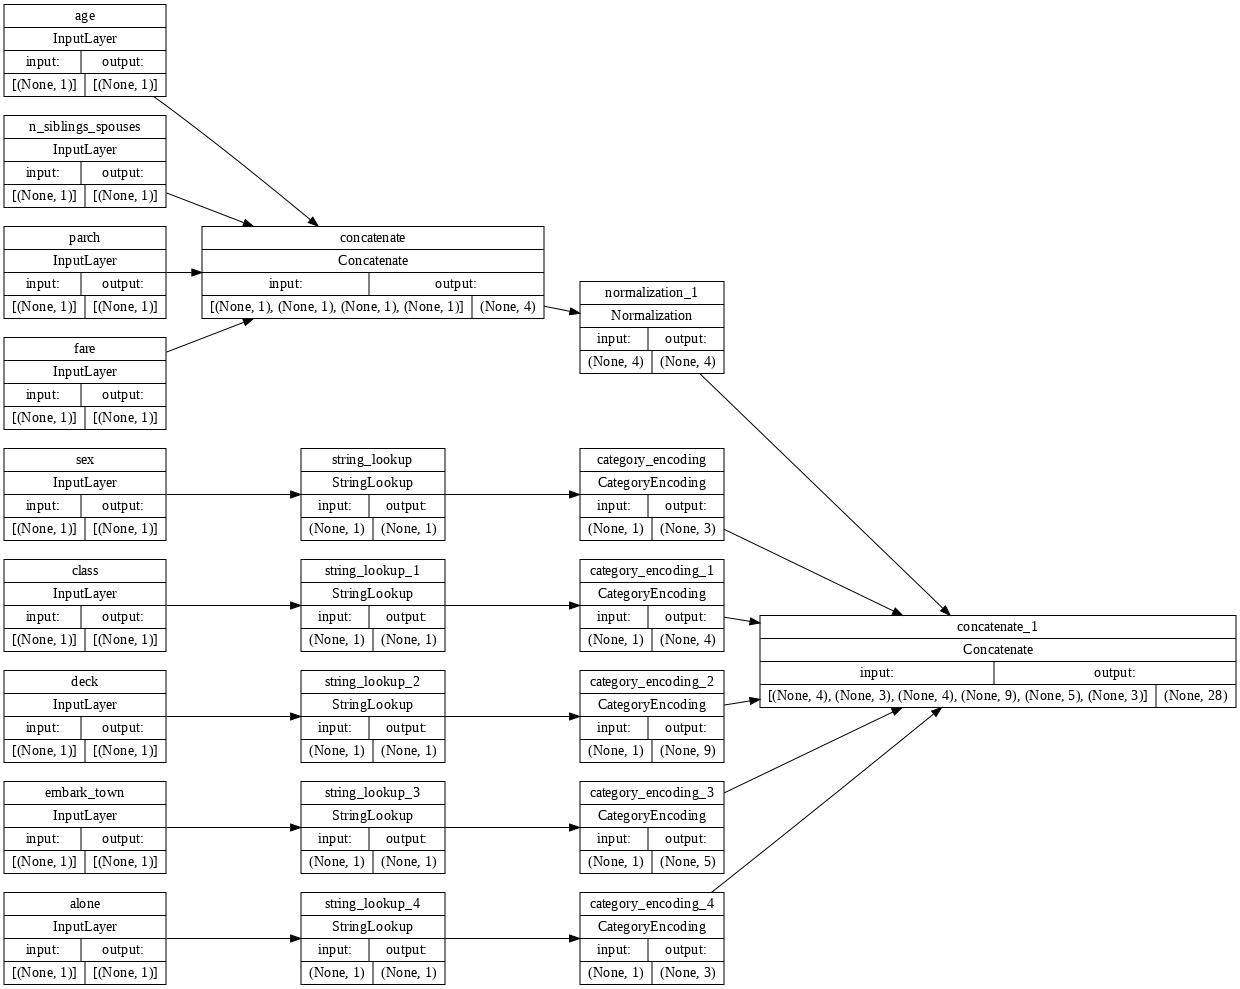

In [39]:
# We can visualize the model
tf.keras.utils.plot_model(model=titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

In [40]:
# Let's build a dictionary of tensors from the pandas dataframe
titanic_features_dict = {}
for name, value in titanic_features.items():
  titanic_features_dict[name] = np.array(value)


In [41]:
# Grab the first training example and see how it is preprocessed
# through the pipeline we've set:
sample_features_dict = {}
for name, values in titanic_features_dict.items():
  sample_features_dict[name] = values[:1]
print(f"Input: {sample_features_dict}")

preprocessed_sample = titanic_preprocessing(sample_features_dict)
print(f"Preprocessed input: {preprocessed_sample}")


Input: {'sex': array(['male'], dtype=object), 'age': array([22.]), 'n_siblings_spouses': array([1]), 'parch': array([0]), 'fare': array([7.25]), 'class': array(['Third'], dtype=object), 'deck': array(['unknown'], dtype=object), 'embark_town': array(['Southampton'], dtype=object), 'alone': array(['n'], dtype=object)}
Preprocessed input: [[-0.61   0.395 -0.479 -0.497  0.     0.     1.     0.     0.     0.
   1.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     0.     0.     1.     0.     0.     1.     0.   ]]


In [42]:
# Build the model in top of the preprocessing pipeline
def titanic_model(preprocessing_head, inputs):

  # Main backbone
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  # Build the complete pipeline: preprocessing + backbone
  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  # Compile the model and return it
  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
  return model

In [43]:
# Now, create the model using the previous function
titanic_model = titanic_model(titanic_preprocessing, inputs)

In [44]:
# Let's train the model: 'x' is the dict of features, while 'y' are the
# labels. Until now, we were using symbolic links but here we are giving 
# real input values
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 7ms/step - loss: 0.6560
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5405
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4893
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4629
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4461
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4362
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4306
Epoch 8/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4269
Epoch 9/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4296
Epoch 10/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4242


In [45]:
# The preprocessing step is saved joinly with the model
titanic_model.save("titanic_model")

INFO:tensorflow:Assets written to: titanic_model/assets


In [46]:
# So when you reload it, you will get the same results
reloaded = tf.keras.models.load_model("titanic_model")

# Let's check it with the first training sample
before = titanic_model(sample_features_dict)
after = reloaded(sample_features_dict)

print(before)
print(after)
assert before == after

tf.Tensor([[-1.803]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.803]], shape=(1, 1), dtype=float32)


## Using tf.data

In the previous section you relied on the model's built-in data shuffling and batching while training the model. If you need more control, use tf.data to build the **data pipeline**.

### On memory data

In [47]:
# To see the first example of using tf.data, consider the following
# generator function:
import itertools

def slices(features):
  for i in itertools.count():  # similar to 'range'
    # For each feature take the sample 'i'
    example = {}
    for name, values in features.items():
      example[name] = values[i]
    yield example

In [48]:
# Let's see this function in action
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name}:{value}")
  break  # we only print the first example

sex:male
age:22.0
n_siblings_spouses:1
parch:0
fare:7.25
class:Third
deck:unknown
embark_town:Southampton
alone:n


In [49]:
# A generalized version of this 'slices' function is the 'from_tensor_slices'
# constructor:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)
type(features_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [50]:
# After building the Dataset, you can iterate over it like we did with 
# the 'slices' function:
for example in features_ds:
  for name, value in example.items():
    print(f"{name}:{value}")
  break  # we only print the first example

sex:b'male'
age:22.0
n_siblings_spouses:1
parch:0
fare:7.25
class:b'Third'
deck:b'unknown'
embark_town:b'Southampton'
alone:b'n'


In [51]:
# 'from_tensor_slices' can handle any structure of nested dicts or tuples
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [52]:
# To use this dataset to train the model, you have to shuffle the data
titanic_shuffle_ds = titanic_ds.shuffle(len(titanic_labels))

In [53]:
# Then, we have to batch the data
titanic_batches = titanic_shuffle_ds.batch(32)

In [54]:
# Now, let's train the model. Instead of passing 'features' and 'labels', we 
# pass the created dataset
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 9ms/step - loss: 0.4209
Epoch 2/5
20/20 [==============================] - 0s 8ms/step - loss: 0.4217
Epoch 3/5
20/20 [==============================] - 0s 8ms/step - loss: 0.4203
Epoch 4/5
20/20 [==============================] - 0s 8ms/step - loss: 0.4205
Epoch 5/5
20/20 [==============================] - 0s 9ms/step - loss: 0.4194


### From a single file

In [55]:
# Get the CSV file
google_storage = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
titanic_file_path = tf.keras.utils.get_file("train.csv", google_storage)
titanic_file_path

40960/30874 [=======================================] - 0s 0us/step


'/root/.keras/datasets/train.csv'

In [56]:
# Now, let's make a dataset from this CSV file
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5,  # artificially small
    label_name="survived",
    num_epochs=1,
    ignore_errors=True
)

In [57]:
# The column headers are used as dict keys
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key}:{value}")
  print(f"Labels: {label}")

sex:[b'female' b'male' b'male' b'female' b'female']
age:[ 0.75 11.   28.   58.   24.  ]
n_siblings_spouses:[2 0 0 0 0]
parch:[1 0 0 1 3]
fare:[ 19.258  18.788  26.55  153.462  19.258]
class:[b'Third' b'Third' b'First' b'First' b'Third']
deck:[b'unknown' b'unknown' b'unknown' b'C' b'unknown']
embark_town:[b'Cherbourg' b'Cherbourg' b'Southampton' b'Southampton' b'Cherbourg']
alone:[b'n' b'y' b'y' b'n' b'n']
Labels: [1 0 1 1 1]


In [58]:
# It can decompress data on the fly too:
google_storage = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
traffic_volume_csv_gz = tf.keras.utils.get_file(
    "Metro_Interstate_Traffic_Volume.csv.gz",
    google_storage,
    cache_dir=".",
    cache_subdir="traffic"
)
traffic_volume_csv_gz

417792/405373 [==============================] - 1s 1us/step


'./traffic/Metro_Interstate_Traffic_Volume.csv.gz'

In [59]:
# Use the 'compression_type' argument to read directly from the compressed file
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=5,
    label_name="traffic_volume",
    num_epochs=1,
    compression_type="GZIP"
)

In [60]:
# See the first batch
for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key}:{value}")
  print(f"Labels: {label}")

holiday:[b'None' b'None' b'None' b'None' b'None']
temp:[288.64 295.29 276.83 273.42 281.48]
rain_1h:[0. 0. 0. 0. 0.]
snow_1h:[0. 0. 0. 0. 0.]
clouds_all:[ 1  1 75 90 40]
weather_main:[b'Clear' b'Thunderstorm' b'Clouds' b'Haze' b'Clouds']
weather_description:[b'sky is clear' b'thunderstorm' b'broken clouds' b'haze'
 b'scattered clouds']
date_time:[b'2013-10-11 04:00:00' b'2013-06-24 04:00:00' b'2013-05-06 08:00:00'
 b'2012-12-01 09:00:00' b'2012-11-19 09:00:00']
Labels: [ 791  848 6289 3648 5133]


### Caching

There is some overhead to parsing the csv data. We can use 'cache' or 'snapshot' so that the csv data is only parsed on the first epoch. The main difference between the cache and snapshot methods is that cache files can only be used by the TensorFlow process that created them, but snapshot files can be read by other processes.

In [61]:
# Iterate 20 times over the traffic volume dataset without caching
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 1000 == 0:
    print(".", end='')  # just a few printing 
print()

.................................................................................................................................................................................................
CPU times: user 1min 55s, sys: 19.4 s, total: 2min 15s
Wall time: 2min 21s


In [62]:
# Same operation but using caching:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)  # apply shuffle after caching
for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 1000 == 0:
    print(".", end='')
print()

.................................................................................................................................................................................................
CPU times: user 54.6 s, sys: 906 ms, total: 55.5 s
Wall time: 53.3 s


In [63]:
# Same operation but using snapshot
%%time
snapshot = tf.data.experimental.snapshot("traffic.tfsnap")
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)
for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 1000 == 0:
    print(".", end='')
print()


Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.
.................................................................................................................................................................................................
CPU times: user 1min 38s, sys: 12.9 s, total: 1min 51s
Wall time: 1min 19s


### Multiple files
One place where tf.data can really simplify things is when dealing with collections of files.

In [64]:
# Let's download the character font images dataset. It contains one CSV
# per font.
google_storage = "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip"
fonts_zip = tf.keras.utils.get_file("fonts.zip",
                                    google_storage,
                                    cache_dir=".",
                                    cache_subdir="fonts",
                                    extract=True)

160325632/160313983 [==============================] - 10s 0us/step


In [65]:
# Let's take a look to some CSVs
import pathlib

unordered_csvs = [str(p) for p in pathlib.Path('fonts').glob("*.csv")]
font_csvs = sorted(unordered_csvs)

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [66]:
# Let's see how many CSVs do we have
len(font_csvs)

153

In [67]:
# Let's create the dataset:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="fonts/*.csv",  # pattern to read all CSVs
    batch_size=10,
    num_epochs=1,
    num_parallel_reads = 20,  # how many files are read in parallel and interleaved
    shuffle_buffer_size=10000
)

In [68]:
# Let's take a look at the 1st batch
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i > 15:
      break  # to print only a few samples
    print(f"{name}:{value}")

print(f"Total features: {len(features)}")

font:[b'VLADIMIR' b'VLADIMIR' b'RICHARD' b'VINER' b'CENTURY' b'GEORGIA'
 b'ROMANTIC' b'GILL' b'PROXY' b'PROXY']
fontVariant:[b'VLADIMIR SCRIPT' b'VLADIMIR SCRIPT' b'POOR RICHARD' b'VINER HAND ITC'
 b'CENTURY SCHOOLBOOK' b'GEORGIA' b'ROMANTIC'
 b'GILL SANS ULTRA BOLD CONDENSED' b'PROXY 9' b'PROXY 9']
m_label:[  174   198   960    92  8222   908 61695   178    45   956]
strength:[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic:[1 1 1 0 0 0 1 0 1 0]
orientation:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top:[34 33 59 38 80 34 40 35 60 52]
m_left:[30 23 25 24 20 20 19 23 36 27]
originalH:[46 47 22 52 18 49 56 27  1 49]
originalW:[ 60 104  36  24  22  54  32  17  32  33]
h:[20 20 20 20 20 20 20 20 20 20]
w:[20 20 20 20 20 20 20 20 20 20]
r0c0:[  1   1   1 125   1 238   1   1 255   1]
r0c1:[  1   1   1 255   1 255   1   1 255   1]
r0c2:[  1   1   1 206  70 254   1  43 255   1]
r0c3:[  1   1  16  53 255  70   1  67 255   1]
Total features: 412


In [69]:
# Let's see the same info but using only 1 CSV
one_font_ds = tf.data.experimental.make_csv_dataset(
    "fonts/AGENCY.csv",
    batch_size=10,
    num_epochs=1,
    shuffle_buffer_size=10000
)

for features in one_font_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i > 15:
      break  # to print only a few samples
    print(f"{name}:{value}")

print(f"Total features: {len(features)}")

font:[b'AGENCY' b'AGENCY' b'AGENCY' b'AGENCY' b'AGENCY' b'AGENCY' b'AGENCY'
 b'AGENCY' b'AGENCY' b'AGENCY']
fontVariant:[b'AGENCY FB' b'AGENCY FB' b'AGENCY FB' b'AGENCY FB' b'AGENCY FB'
 b'AGENCY FB' b'AGENCY FB' b'AGENCY FB' b'AGENCY FB' b'AGENCY FB']
m_label:[235 238  62 216 164 937 107 253 188 246]
strength:[0.7 0.7 0.4 0.4 0.7 0.7 0.4 0.7 0.7 0.4]
italic:[0 0 0 1 0 0 1 0 0 0]
orientation:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top:[43 42 51 35 46 35 35 42 35 45]
m_left:[23 17 24 20 24 22 24 20 21 24]
originalH:[43 44 27 51 32 51 51 56 51 41]
originalW:[21 19 17 47 31 31 27 23 35 18]
h:[20 20 20 20 20 20 20 20 20 20]
w:[20 20 20 20 20 20 20 20 20 20]
r0c0:[  1   1 255   1   1   1   1   1   1   1]
r0c1:[ 25   1 100   1  79  46   1   1  16   1]
r0c2:[255   1  24   1 189 197   1   1 198 199]
r0c3:[255   1   1   1  22 255   1   1 255 255]
Total features: 412


### Packing fields
You probably don't want to work with each pixel in separate columns like this. Before trying to use this dataset be sure to pack the pixels into an image-tensor.

In [70]:
# Let's create a function to build images from the previous dataset cols
import re 

def make_images(features):
  image = [None] * 400  # images are 20x20
  new_feats = {}

  for name, value in features.items():
    # pixels are stored in 'r{row}c{col}' features
    match = re.match("r(\d+)c(\d+)", name)
    if match:
      # It's pixel value. There are 20 cols per row.
      row_index = int(match.group(1))
      col_index = int(match.group(2))
      image[row_index * 20 + col_index] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  print(type(image))
  print(image.shape)
  image = tf.reshape(image, [20, 20, -1])
  new_feats["image"] = image

  return new_feats

In [71]:
# Apply the function to each batch in the dataset
fonts_image_ds = fonts_ds.map(make_images)

<class 'tensorflow.python.framework.ops.Tensor'>
(400, None)


In [72]:
# Let's take a look again at the 1st batch
for features in fonts_image_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i > 15:
      break  # to print only a few samples
    print(f"{name}:{value}")

print(f"Total features: {len(features)}")

font:[b'LEELAWADEE' b'BRUSH' b'SCRIPT' b'ROMAN' b'TXT' b'GEORGIA' b'DUTCH801'
 b'ROMAN' b'BAUHAUS' b'ROMAN']
fontVariant:[b'LEELAWADEE UI SEMILIGHT' b'BRUSH SCRIPT MT' b'SCRIPTS' b'ROMANT' b'TXT'
 b'GEORGIA' b'DUTCH801 XBD BT' b'ROMANT' b'BAUHAUS 93' b'ROMANT']
m_label:[ 6030 61441   122   230  1100  1080  8726    41   119   189]
strength:[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic:[0 0 0 0 1 0 1 0 0 0]
orientation:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top:[47 40 67 56 46 50 38 30 48 30]
m_left:[27 18 22 27 28 22 19 29 24 29]
originalH:[37 57 50 34 32 32 59 76 33 69]
originalW:[61 38 34 48 28 37 54 18 44 60]
h:[20 20 20 20 20 20 20 20 20 20]
w:[20 20 20 20 20 20 20 20 20 20]
image:[[[  1   1   1 ...  68 255   1]
  [ 86   1   1 ... 127 255   1]
  [255   1   5 ... 135 255   1]
  ...
  [255   1   1 ...   1 255   1]
  [122   1   1 ...   1 255   1]
  [  2   1   1 ...   1 255   1]]

 [[113   1   1 ...   1 255   1]
  [249   1   1 ...   1 255   1]
  [255   1  97 ...   1 255  23]
  ...
  [255 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 6030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 6030 missing from current font.
  font.set_text(s, 0, flags=flags)


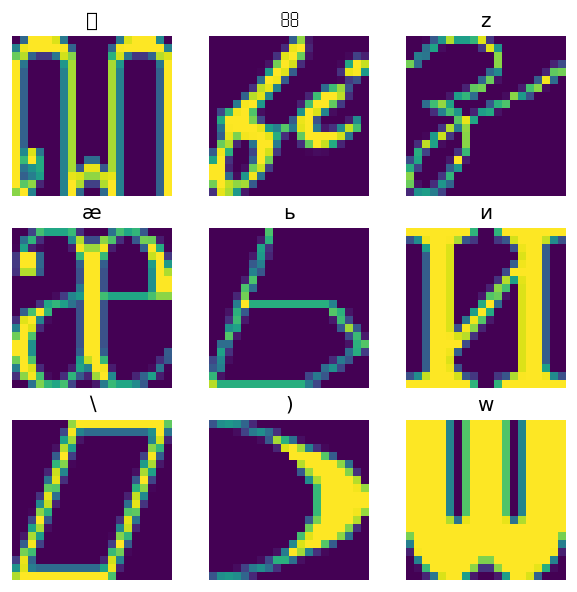

In [73]:
# Finally, plot the resulting images
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3, 3, n+1)
  plt.imshow(features["image"][..., n])
  plt.title(chr(features["m_label"][n]))
  plt.axis("off")

### Lower level functions

#### tf.io.decode_csv

In [74]:
# Read the titanic data lines 
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

# Set the type of the features: all strings
all_strings = [str()] * 10

# Use tf.io.decode_csv 
features = tf.io.decode_csv(lines, record_defaults=all_strings)

# Print some info
print(f"Some lines: {lines[0:5]}")
for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

Some lines: ['0,male,22.0,1,0,7.25,Third,unknown,Southampton,n', '1,female,38.0,1,0,71.2833,First,C,Cherbourg,n', '1,female,26.0,0,0,7.925,Third,unknown,Southampton,y', '1,female,35.0,1,0,53.1,First,C,Southampton,n', '0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y']
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [75]:
# Now, let's parse them with the correct type
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]

features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


#### tf.data.experimental.CsvDataset

In [76]:
# Let's use this class with the titanic dataset
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path,
                                                 record_defaults=titanic_types,
                                                 header=True)

In [80]:
# And now visualize them
for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [81]:
# This is similar to:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (tf.data.TextLineDataset(titanic_file_path).skip(1).map(decode_titanic_line))

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


##### Multiple files

In [87]:
# First, we have to determine the column types. Let's inspect the first row of
# the first file
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_csvs[0])
print(font_line)

# The first two columns are strings, and the rest are ints or floats. 
num_font_features = font_line.count(',') + 1  # to know how many features we have
font_column_types = [str()] * 2 + [float()] * (num_font_features - 2)

# CsvDataset reads the input files sequentially.
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults=font_column_types,
    header=True
)

# Now, visualize the first column of the 10 first examples
for row in simple_font_ds.take(10):
  print(row[0].numpy())

fonts/AGENCY.csv
AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255

In [89]:
# To interleave multiple files, we can do the following:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

# Define a function to create a CsvDataset
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
      path,
      record_defaults=font_column_types,
      header=True
  )

# Now, call the 'interleave' function and give the previous function as argument
font_rows = font_files.interleave(make_font_csv_ds, cycle_length=3)

In [90]:
# Let's visualize the interleaved data
fonts_dict = {"font_name": [], "character": []}

for row in font_rows.take(10):
  fonts_dict["font_name"].append(row[0].numpy().decode())
  fonts_dict["character"].append(chr(row[2].numpy()))

# Create a dataframe
pd.DataFrame(fonts_dict)

,font_name,character
0,CENTURY,ﬂ
1,OCRB,<
2,NIAGARA,ﬂ
3,CENTURY,ﬁ
4,OCRB,<
5,NIAGARA,ﬁ
6,CENTURY,
7,OCRB,(
8,NIAGARA,
9,CENTURY,


### Performance

io.decode_csv is more efficient when run on a batch of strings. Let's compare it with the standard 'make_csv_dataset'.

In [91]:
BATCH_SIZE = 2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="fonts/*.csv",
    batch_size=BATCH_SIZE,
    num_epochs=1,
    num_parallel_reads=100
)

In [92]:
# Let's measure the time using 'make_csv_dataset'
%%time
for i, batch in enumerate(fonts_ds.take(20)):
  print(".", end="")
print()

....................
CPU times: user 18.8 s, sys: 1.68 s, total: 20.5 s
Wall time: 14.5 s


In [96]:
# Let's use 'decode_csv'
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [97]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')
print()

....................
CPU times: user 7.45 s, sys: 66 ms, total: 7.52 s
Wall time: 4.04 s


Note: Consider 'cache' and 'snapshot' preferably for increasing performance.